In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
car = pd.read_csv("./car+evaluation/car.data", header=None)
car.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']
car

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1728 non-null   object
 1   Maint       1728 non-null   object
 2   Doors       1728 non-null   object
 3   Persons     1728 non-null   object
 4   LugBoot     1728 non-null   object
 5   Safety      1728 non-null   object
 6   Evaluation  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
#To find the number of values in each feature
for col in car.columns:
    print(car[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: Buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: Maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: Doors, dtype: int64
2       576
4       576
more    576
Name: Persons, dtype: int64
small    576
med      576
big      576
Name: LugBoot, dtype: int64
low     576
med     576
high    576
Name: Safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: Evaluation, dtype: int64


In [6]:
car['Evaluation'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Evaluation, dtype: int64

In [7]:
#Checking if the data contains null or na values
print(car.isna().values.any())
print(car.isnull().values.any())

False
False


In [8]:
#Feature Selection
X = car.drop(['Evaluation'], axis=1)
y = car['Evaluation']

In [9]:
#Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [10]:
y_train.shape, y_test.shape

((1209,), (519,))

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train['Buying'] = encoder.fit_transform(X_train['Buying'])
X_test['Buying'] = encoder.transform(X_test['Buying'])
X_train['Maint'] = encoder.fit_transform(X_train['Maint'])
X_test['Maint'] = encoder.transform(X_test['Maint'])
X_train['Doors'] = encoder.fit_transform(X_train['Doors'])
X_test['Doors'] = encoder.transform(X_test['Doors'])
X_train['Persons'] = encoder.fit_transform(X_train['Persons'])
X_test['Persons'] = encoder.transform(X_test['Persons'])
X_train['LugBoot'] = encoder.fit_transform(X_train['LugBoot'])
X_test['LugBoot'] = encoder.transform(X_test['LugBoot'])
X_train['Safety'] = encoder.fit_transform(X_train['Safety'])
X_test['Safety'] = encoder.transform(X_test['Safety'])

X_train['Buying'].value_counts()

2    308
3    305
0    299
1    297
Name: Buying, dtype: int64

Random Forest Classifier

In [12]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#instantiating the classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)

#fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [13]:
#Predicting the Test Set results
y_pred = rfc.predict(X_test)

In [14]:
#Checking the Accuracy Score
from sklearn.metrics import accuracy_score
print("Model Accuracy score: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Model Accuracy score: 0.9538


Random Forest Classifier Model with parameter n_estimators=100

In [15]:
#Instantiating the Classifier with n_estimators (100)
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=6)

#Fitting the Model
rfc_100.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=0)

In [16]:
#Predicting on the test results
y_pred_100 = rfc_100.predict(X_test)

In [17]:
#Checking the Accuracy Score
print("Model Accuracy score with 100 decision trees: {0:0.4f}".format(accuracy_score(y_test, y_pred_100)))

Model Accuracy score with 100 decision trees: 0.8709


In [18]:
#Viewing the Feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Safety     0.266858
Persons    0.221481
Buying     0.220549
Maint      0.131777
LugBoot    0.087084
Doors      0.072250
dtype: float64

In [19]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

         acc       0.89      0.92      0.90       118
        good       0.77      0.89      0.83        19
       unacc       0.99      0.97      0.98       358
       vgood       0.96      0.92      0.94        24

    accuracy                           0.95       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.96      0.95      0.95       519



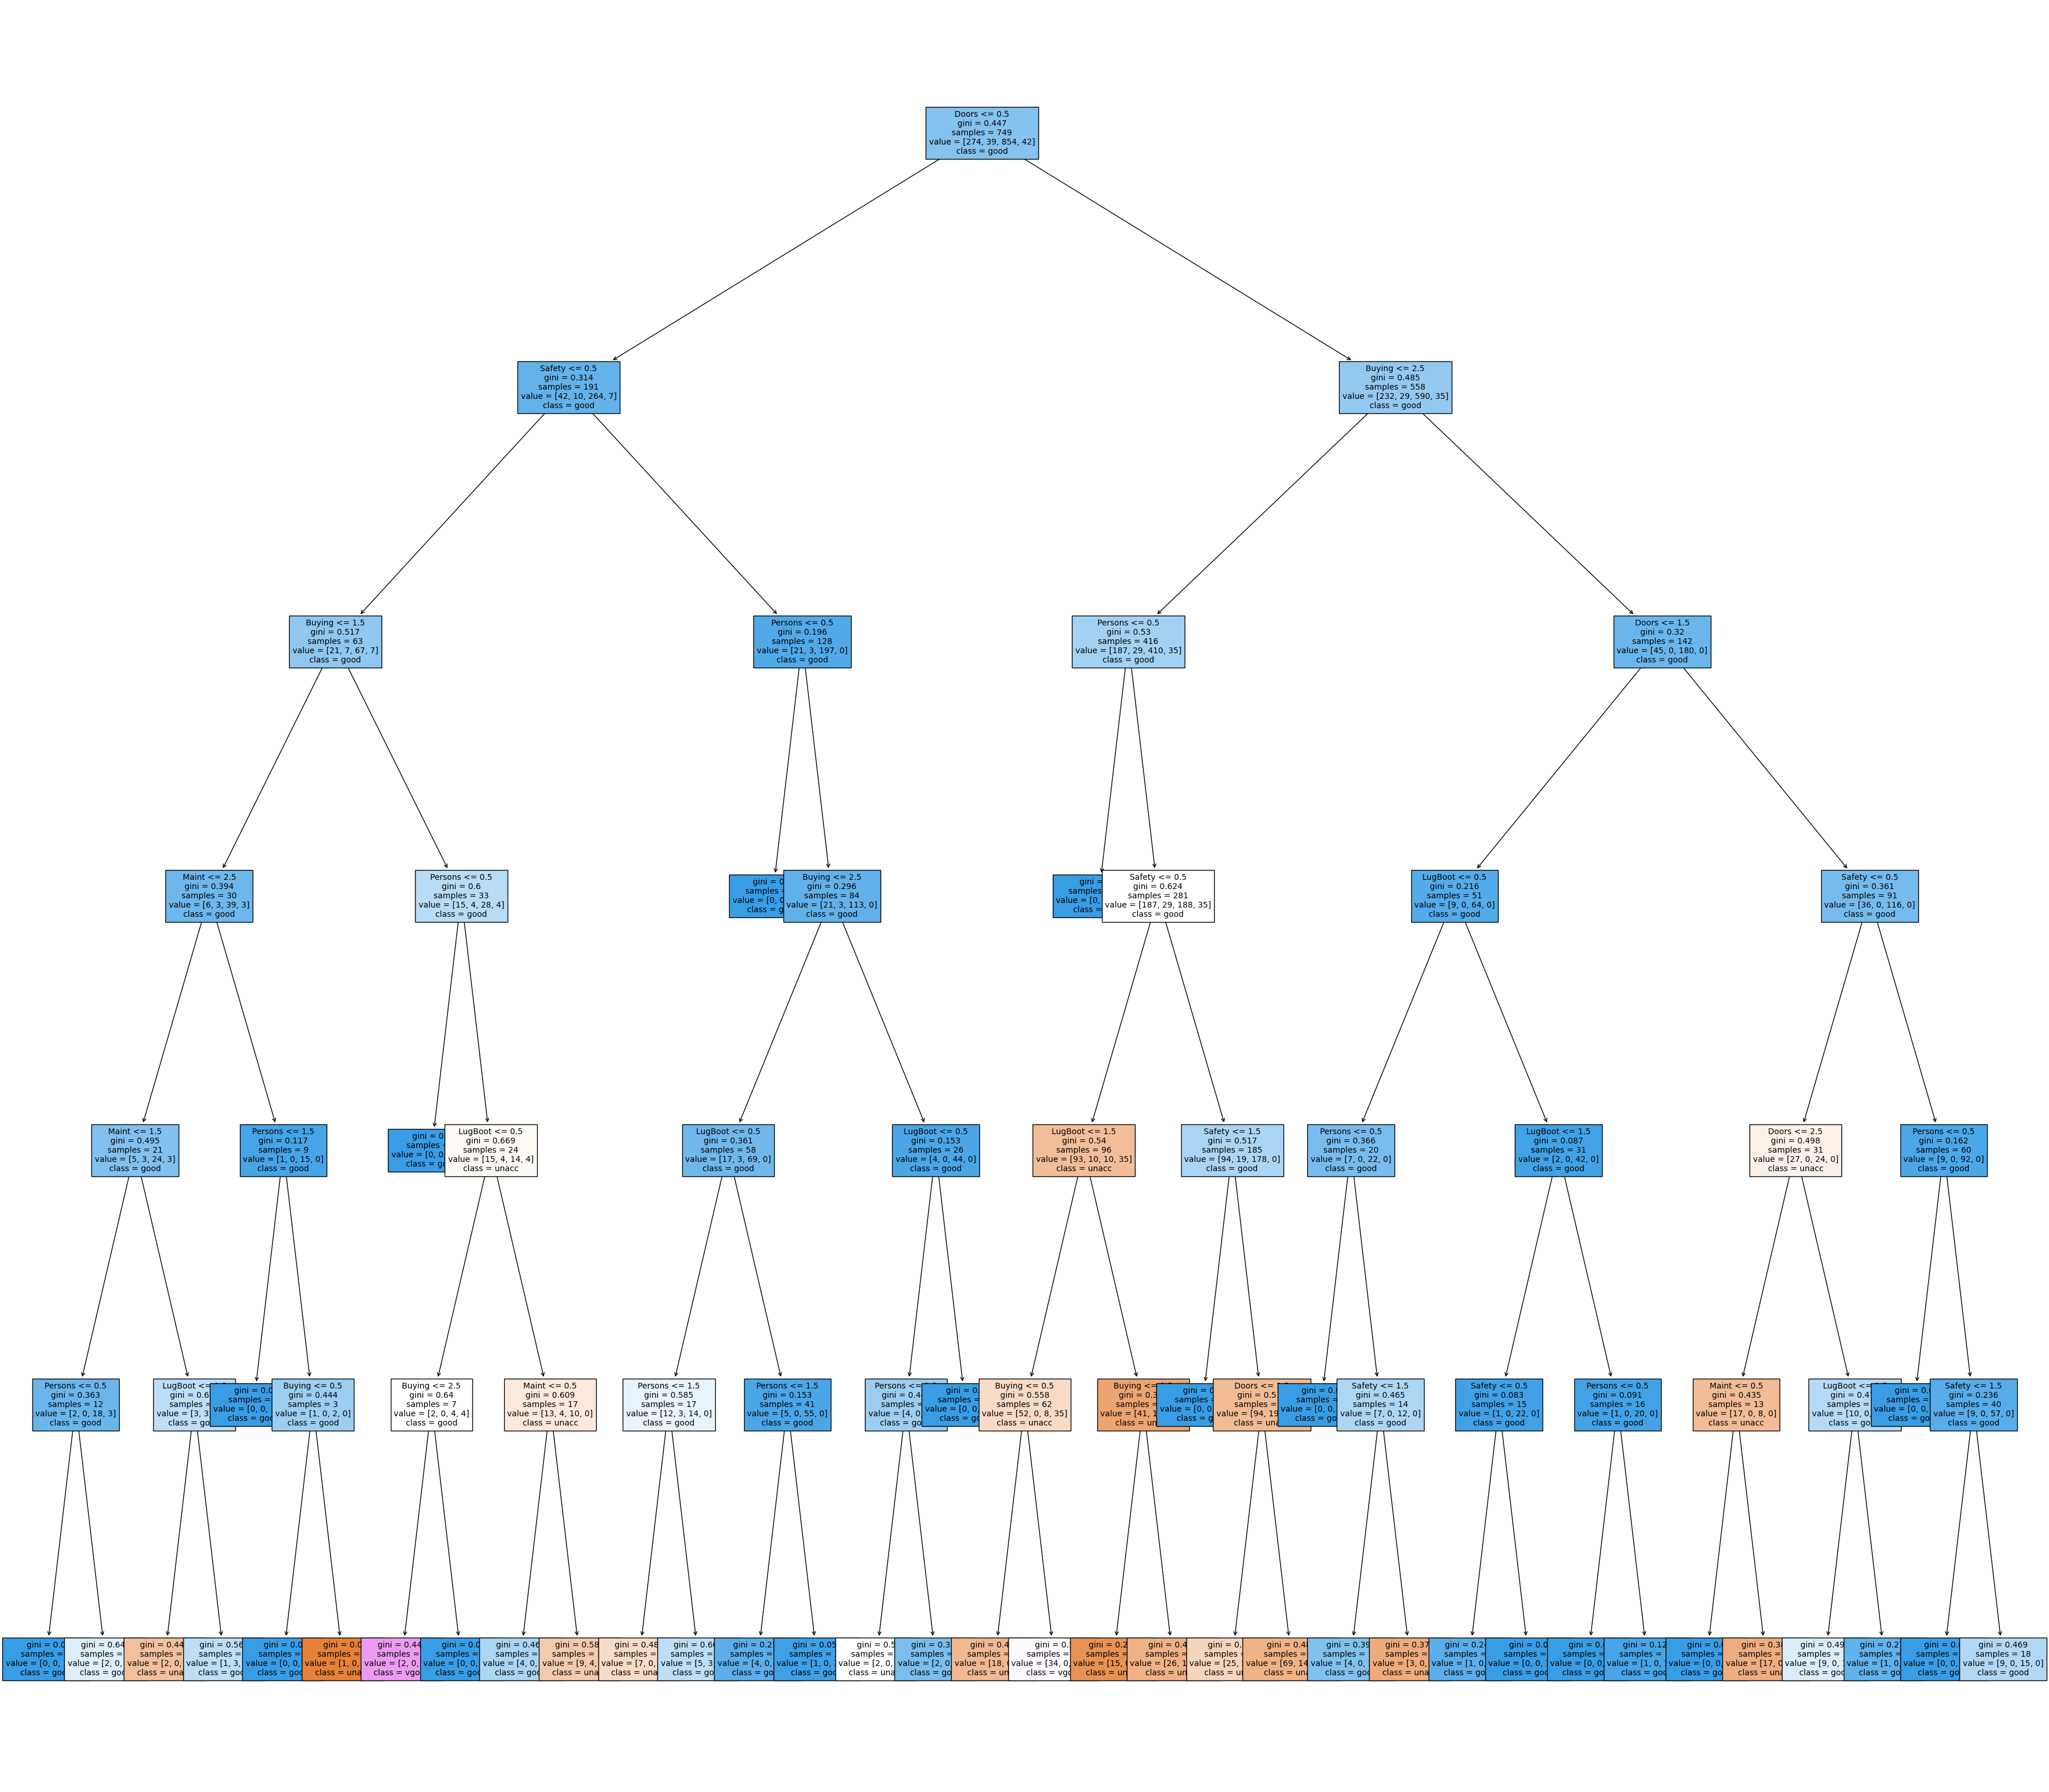

In [20]:
from sklearn import tree

def plot_DT(model):
    #Plotting the Random Forest Tree
    plt.figure("Random Forest Tree", figsize=(45, 40))
    tree.plot_tree(model, fontsize=10, filled=True, feature_names=["Buying", "Maint", "Doors", "Persons", "LugBoot", "Safety"], class_names=["unacc", "acc", "good", "vgood"])
#plt.tight_layout()
#plt.show()

plot_DT(rfc_100.estimators_[0])

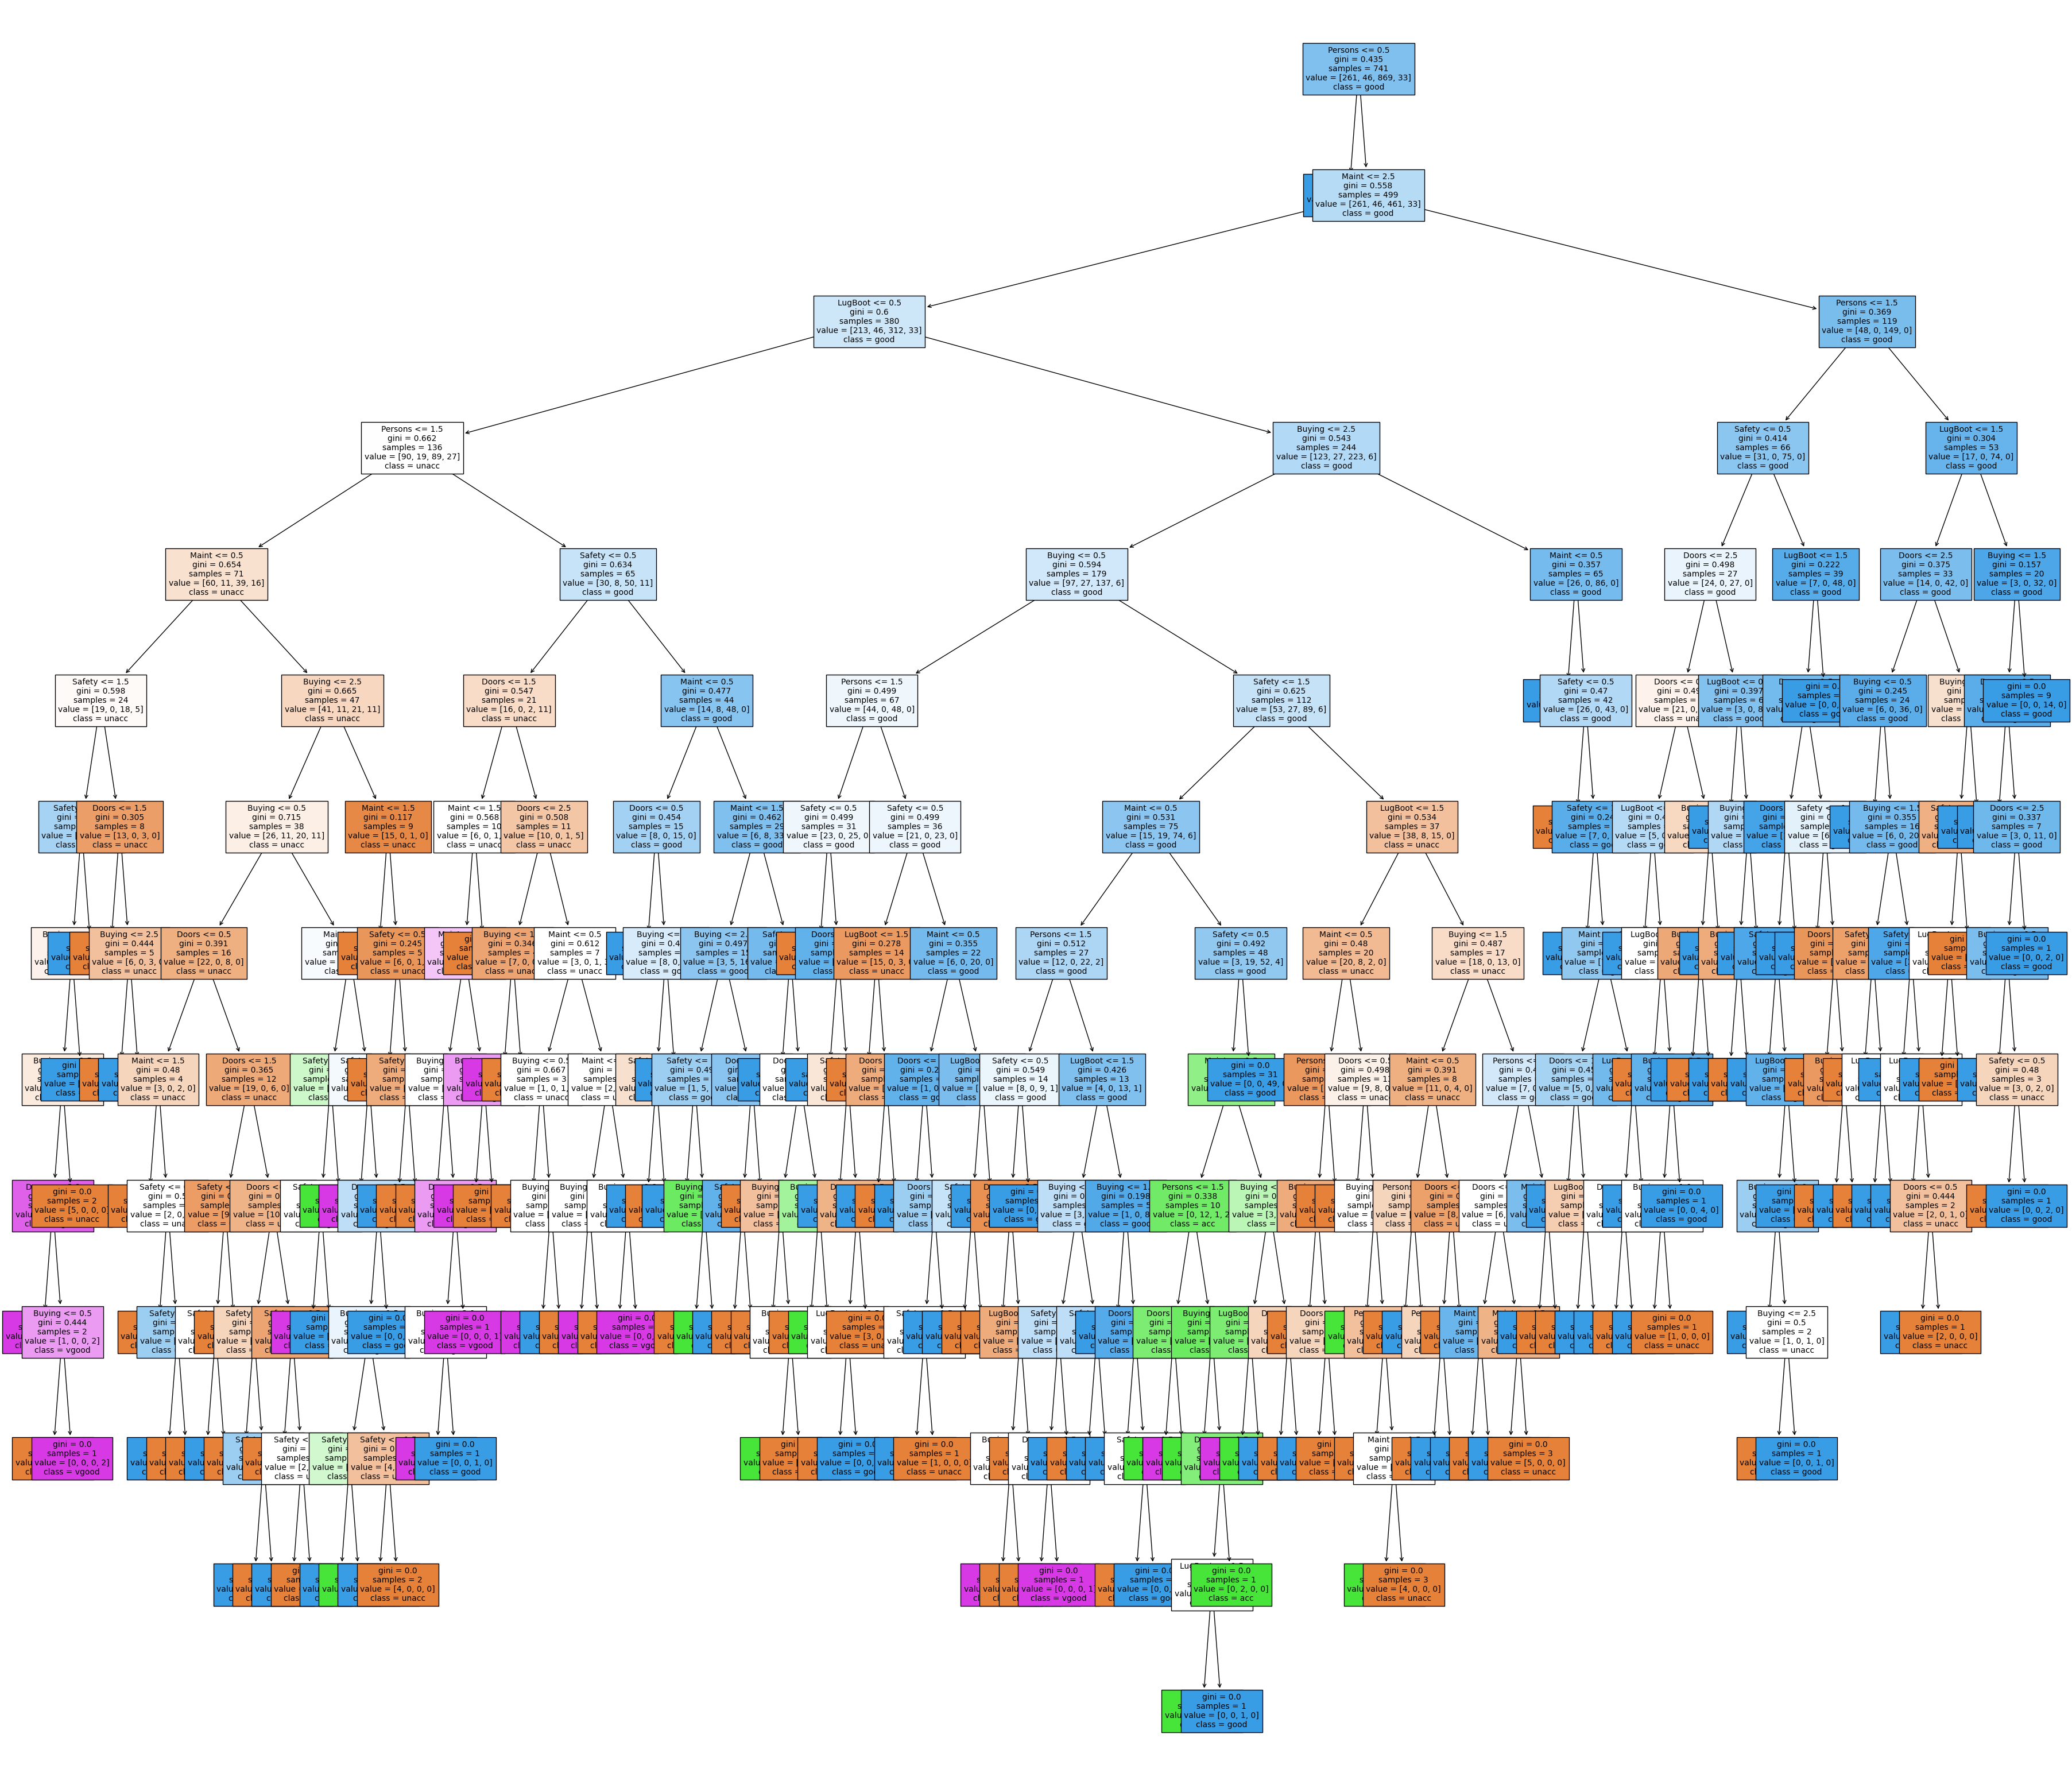

In [21]:
plot_DT(rfc.estimators_[1])